In [1]:
#Note
# Check for multivariate outliers and try a model for that too
# Check whether the assumptions are held for the model built
# I can change the alpha and see. Draw the graph for alpha and get the value
# Check the colinearity between the variables - feature selection

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
import seaborn as sns
plt.style.use('seaborn')

In [60]:
df = pd.read_csv(r"C:\Users\Suwani Gunasekara\OneDrive\Documents\Sem 7 ML\winequality-red.csv")

In [61]:
df.head()

,WineRedSerial,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [62]:
df.columns

Index(['WineRedSerial', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [63]:
df.isnull().sum()

WineRedSerial           0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [64]:
df.describe()

,WineRedSerial,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,800.000000,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,461.735855,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,1.000000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,400.500000,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,800.000000,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,1199.500000,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,1599.000000,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [65]:
#sns.boxplot(x = df['fixed acidity'])

In [66]:
#sns.boxplot(x = df['volatile acidity'])

In [67]:
#sns.boxplot(x = df['citric acid'])

In [68]:
#sns.boxplot(x = df['residual sugar'])

In [69]:
#sns.boxplot(x = df['chlorides'])

In [70]:
#sns.boxplot(x = df['free sulfur dioxide'])

In [71]:
#sns.boxplot(x = df['total sulfur dioxide'])

In [72]:
#sns.boxplot(x = df['density'])

In [73]:
#sns.boxplot(x = df['pH'])

In [74]:
#sns.boxplot(x = df['sulphates'])

In [75]:
#sns.boxplot(x = df['alcohol'])

In [76]:
dfo = df[['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates']]

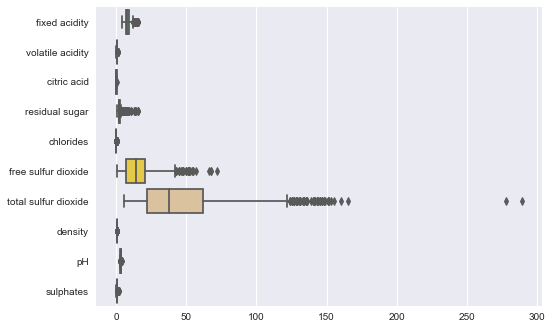

In [77]:
ax = sns.boxplot(data=dfo, orient="h", palette="Set2")

In [78]:
#normalizing
dfN = df[['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
# this is the z score as well
data= (dfN - dfN.mean()) / dfN.std()
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946


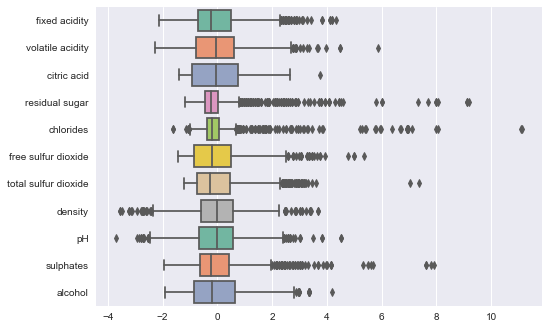

In [89]:
ax = sns.boxplot(data=data, orient="h", palette="Set2")

In [81]:
data.shape

(1599, 11)

In [88]:
df_wo = data[data<3].all(axis = 1)

In [87]:
df_wo.shape

(11,)

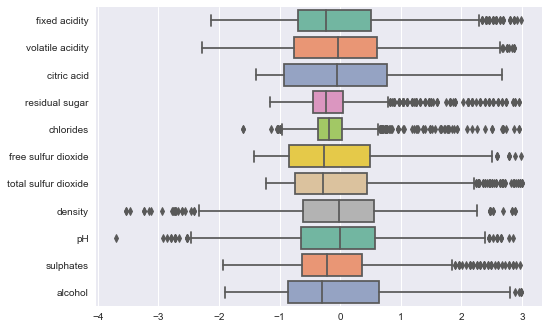

In [83]:
ax = sns.boxplot(data=df_wo, orient="h", palette="Set2")

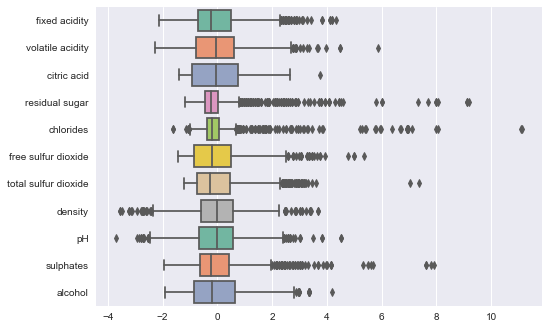

In [22]:
ax = sns.boxplot(data=data, orient="h", palette="Set2")

#### For normalized data without removing outliers

In [23]:
data2 = data

In [24]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [25]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [26]:
alpha = 0.01
iters = 1000

In [31]:
# add ones column
#data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0,0,0,0,0,0,0,0,0]))

# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)

0.17422279015571923

In [34]:
g2

matrix([[ 3.69718515e-13,  5.60068479e-01,  7.57092336e-02,
          2.56695215e-01,  3.27634101e-01, -1.31016132e-01,
          1.56670036e-02, -1.50236867e-01, -9.14099358e-01,
          4.01481741e-01,  1.96753490e-01]])

Text(0.5, 1.0, 'Error vs. Training Epoch')

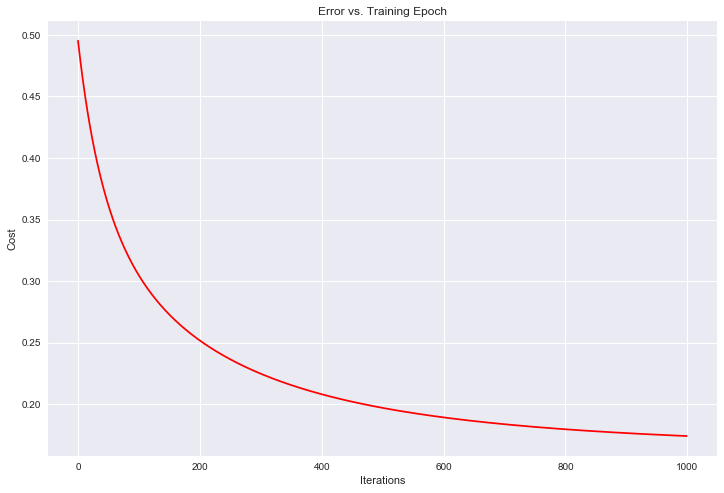

In [32]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

In [38]:
#https://www.geeksforgeeks.org/python-mean-squared-error/
MSE = np.square(np.subtract(y2,X2*g2.T)).mean()

In [39]:
MSE

0.34844558031143846

In [41]:
#corr_matrix = numpy.corrcoef(actual, predict)
corr_matrix = np.corrcoef(y2, X2*g2.T)
corr = corr_matrix[0,1]
R_sq = corr**2
 
print(R_sq)

nan


C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [42]:
#https://www.askpython.com/python/coefficient-of-determination
from sklearn.metrics import r2_score 
R_square = r2_score(y2, X2*g2.T) 
print('Coefficient of Determination', R_square) 

Coefficient of Determination 0.6513363686370539


In [45]:
#https://moonbooks.org/Articles/How-to-calculate-a-root-mean-square-using-python-/
from sklearn.metrics import mean_squared_error

print('mse (sklearn): ', mean_squared_error(y2, X2*g2.T))

mse (sklearn):  0.34844558031143846


In [48]:
#https://www.vernier.com/til/1014
RMSE = MSE ** (0.5)
print(RMSE)

0.5902927920205687
